<a href="https://colab.research.google.com/github/Srish0218/Complete-Python/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
cols = ['fLength' , 'fWidth' , 'fSize' , 'fConc' , 'fConc1' , 'fAsym' ,'fM3Long' , 'fM3Trans' , 'fAlpha' , 'fDist' , 'class' ]
df = pd.read_csv("magic04.data" , names = cols)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -8.2027  40.0920   81.8828     g  
1       -9.9574   6.3609  205.2610     g  
2      -45.2160  76.9600  256.7880     g  
3       -7.1513  10.4490  116.7370     g  
4       21.8393   4.6480  356.4620     g  
...         ...      ...       ...   ...  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h  

[19020 rows x 11 columns]

In [7]:
df['class'] = (df['class'] == 'g').astype(int)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']


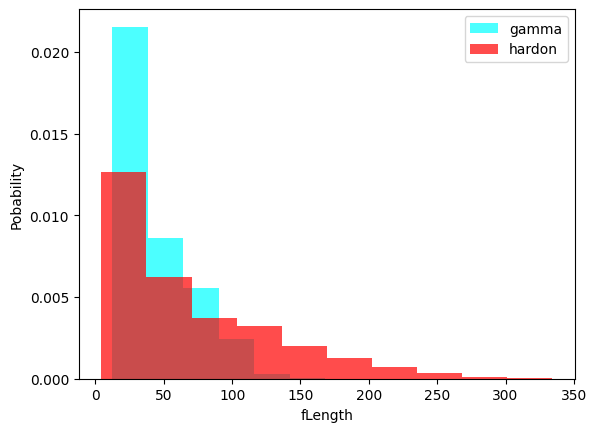

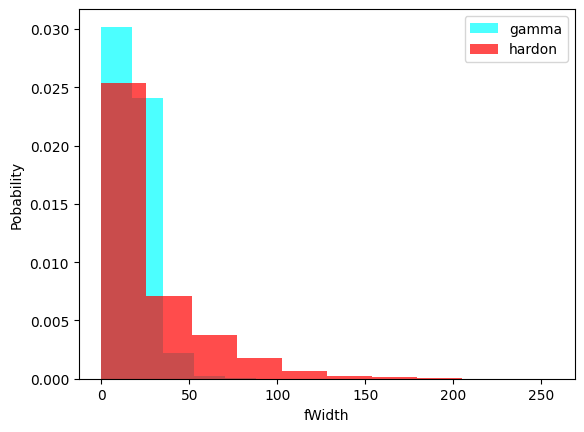

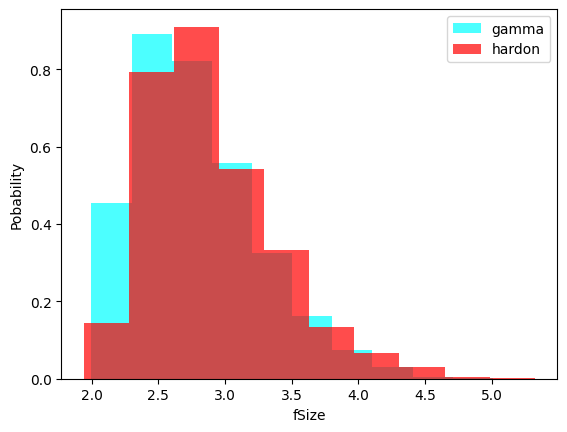

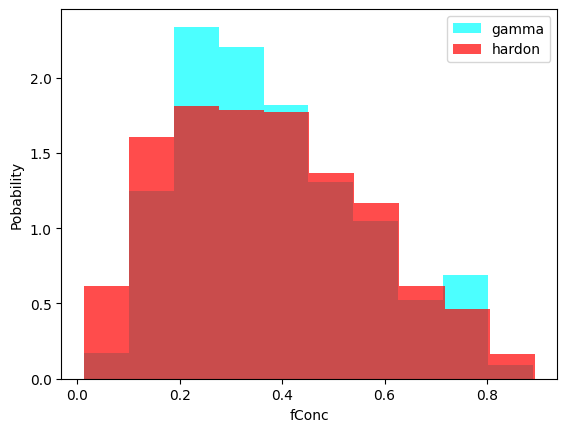

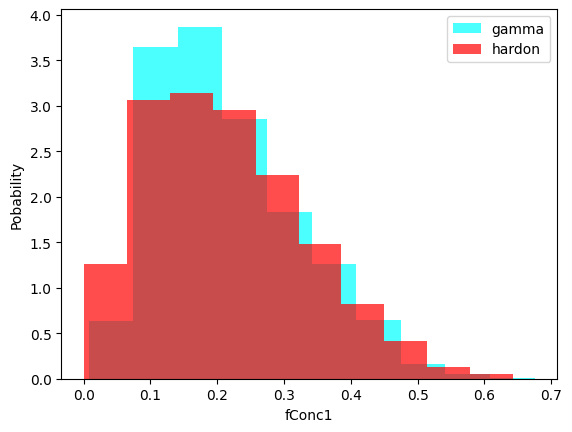

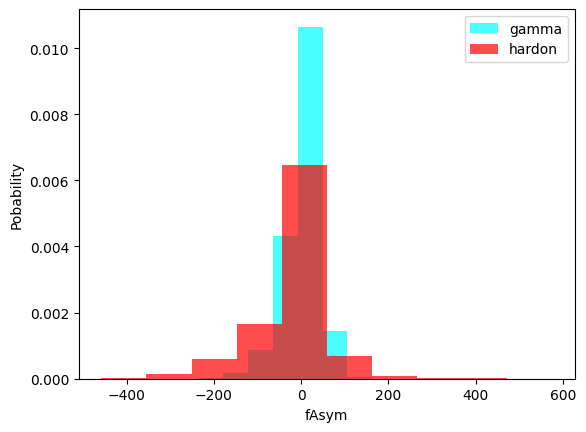

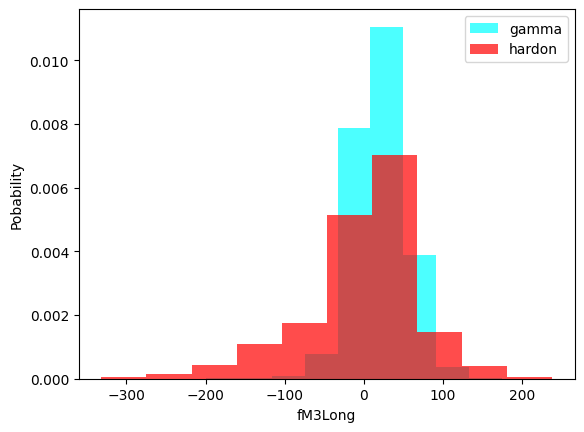

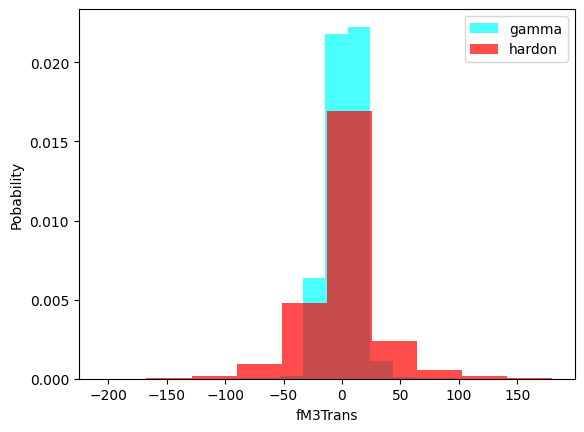

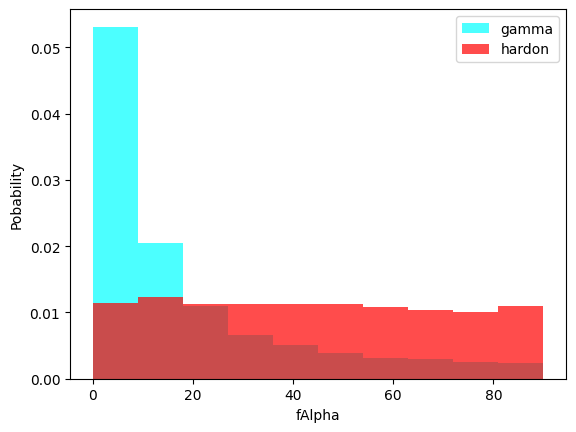

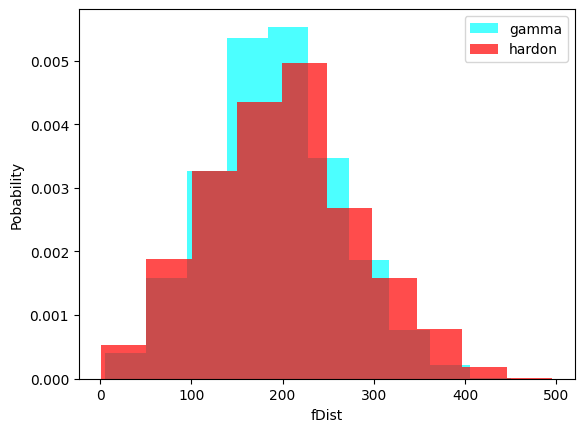

In [8]:
print(cols[:-1])
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label] , color = 'cyan' , label = 'gamma' , alpha = 0.7 , density = True)
  plt.hist(df[df['class'] == 0][label] , color = 'red' , label = 'hardon' , alpha = 0.7 , density = True)
  plt.ylabel('Pobability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


# train validate , test

In [9]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

In [10]:
def scale_dataset(dataframe , oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X , Y = ros.fit_resample(X , Y)

  data = np.hstack((X , np.reshape(Y , (-1 , 1))))

  return data , X, Y

print(len(train[train['class'] == 1]) , len(train[train['class'] == 0]) )

output - 7348 4064

this is to check the number of 0s and 1s

as they are different we need to make then equal using oversample



In [11]:
train , X_train , Y_train = scale_dataset(train , oversample = True)
valid , X_valid , Y_valid = scale_dataset(valid , oversample = False)
test , X_test , Y_test = scale_dataset(test , oversample = False)

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=1)

Here, you create an instance of the KNeighborsClassifier class with n_neighbors=1. The n_neighbors parameter defines the number of neighbors to consider when making predictions. In this case, it's set to 1, meaning it will consider only the closest neighbor.

This line fits (trains) the KNN model using the training features X_train and their corresponding labels Y_train. The model is now ready to make predictions on new, unseen data.
In the context of machine learning, the term "fitting" or "training" refers to the process of adjusting the parameters of a model based on the input data (features) and their corresponding target labels. The primary goal is to enable the model to make accurate predictions or classifications on new, unseen data.



In [14]:

y_pred = knn_model.predict(X_test)

is using the trained k-nearest neighbors (KNN) model (knn_model) to make predictions on a set of test data (X_test). Let me break down what's happening:

X_test represents the test features, which are the input variables or attributes for which you want to make predictions.

The predict method is a common function in many machine learning models, including KNN. It takes a set of input features (X_test in this case) and returns the predicted output labels.

y_pred will be a NumPy array or another data structure containing the predicted labels for the corresponding test features.

In [15]:
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [16]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1360
           1       0.83      0.89      0.86      2444

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model  = GaussianNB()
nb_model = nb_model.fit(X_train , Y_train)

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1360
           1       0.73      0.90      0.81      2444

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



If you obtained the same output for the classification report when using both the k-nearest neighbors (KNN) model and the Gaussian Naive Bayes (NB) model, it suggests that the two models performed similarly on your test data according to the classification metrics provided in the report.

The classification report typically includes metrics such as precision, recall, f1-score, and support for each class. Here's what these metrics mean:

- **Precision:** The ability of the classifier not to label as positive a sample that is negative. It is the ratio of true positives to the sum of true positives and false positives.

- **Recall:** The ability of the classifier to find all the positive samples. It is the ratio of true positives to the sum of true positives and false negatives.

- **F1-score:** The harmonic mean of precision and recall. It provides a balance between precision and recall.

- **Support:** The number of actual occurrences of the class in the specified dataset.

If the classification reports for both the KNN and Gaussian NB models are very similar, it indicates that the models have similar performance on the test set based on these metrics. However, it's essential to consider other factors and possibly use additional evaluation methods to gain a comprehensive understanding of your models' performance.

Keep in mind that the choice between models might depend on the specific characteristics of your data and the problem you are trying to solve. If you have specific questions about the results or if you'd like to explore further, feel free to share more details or ask additional questions!


# logistic regression


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model  = LogisticRegression ()
lg_model = lg_model.fit(X_train , Y_train)

In [22]:
y_pred = lg_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69      1360
           1       0.83      0.82      0.82      2444

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.77      3804



# SVM

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model = svm_model.fit(X_train , Y_train)

In [25]:
y_pred = svm_model.predict(X_test)
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1360
           1       0.88      0.90      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [26]:
import tensorflow as tf

In [27]:
def plot_history(history):
    fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (10 ,4))
    ax1.plot(history.history['loss'] , label = 'loss')
    ax1.plot(history.history['val_loss'] , label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'] , label = 'accuracy')
    ax2.plot(history.history['val_accuracy'] , label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('accuracy')
    ax2.grid(True)

    plt.show()



In [28]:
def train_model(X_train , Y_train , num_nodes , dropout_prob , lr , batch_size , epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes , activation = 'relu' , input_shape = (10 , )),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes , activation = 'relu' ),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1 , activation = 'sigmoid')
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr) , loss = 'binary_crossentropy' , metrics = ['accuracy'])
    history = nn_model.fit(    X_train , Y_train, epochs = epochs , batch_size= batch_size , validation_split = 0.2 , verbose = 0)

    return nn_model , history


nodes = 16, dropout = 0, lr = 0.01, batch size = 32


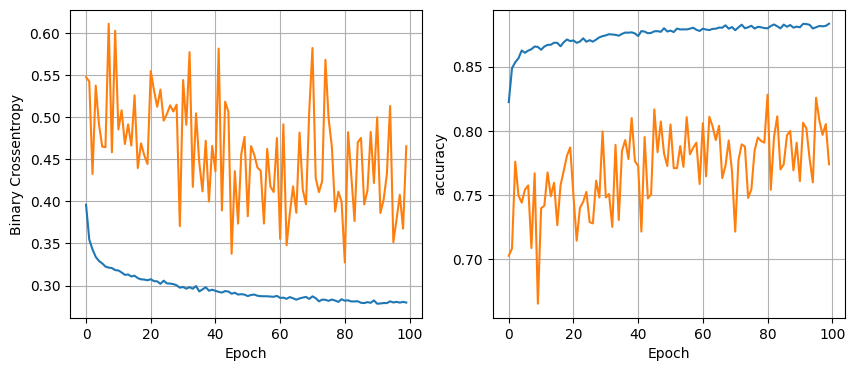

119/119 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8704
nodes = 16, dropout = 0, lr = 0.01, batch size = 64


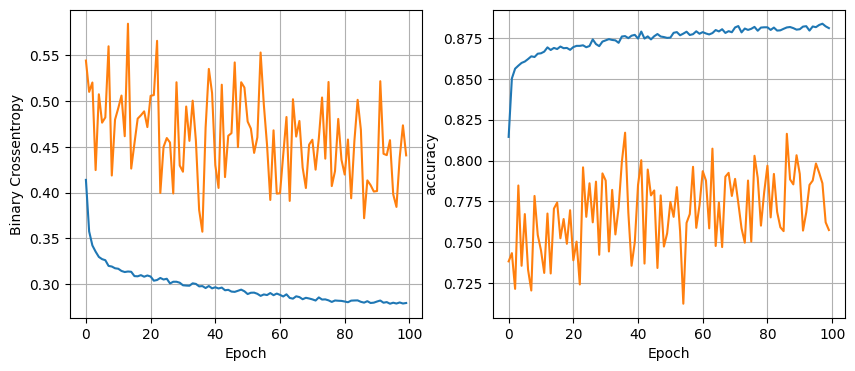

119/119 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8693
nodes = 16, dropout = 0, lr = 0.01, batch size = 128


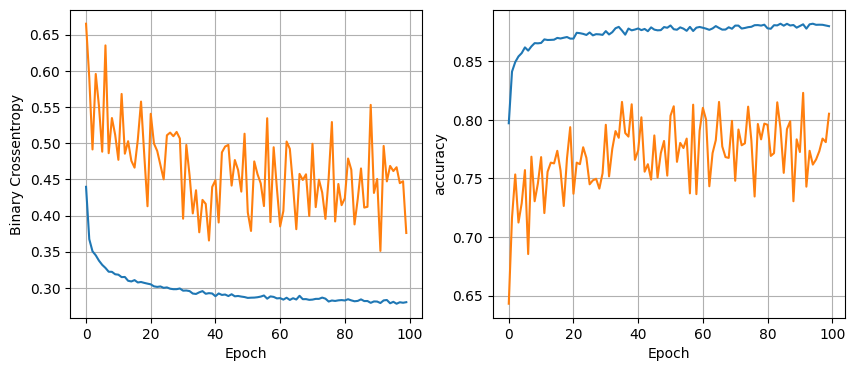

119/119 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8736
nodes = 16, dropout = 0, lr = 0.005, batch size = 32


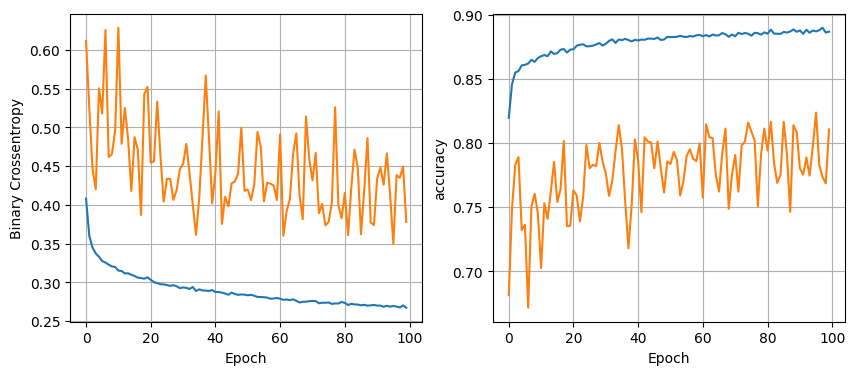

119/119 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8725
nodes = 16, dropout = 0, lr = 0.005, batch size = 64


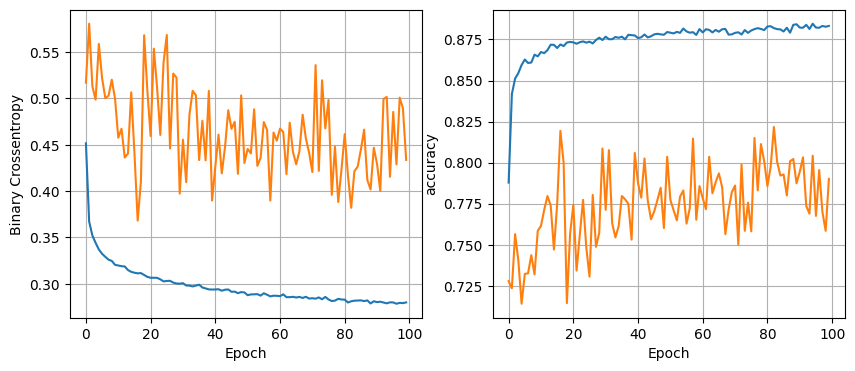

119/119 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8730
nodes = 16, dropout = 0, lr = 0.005, batch size = 128


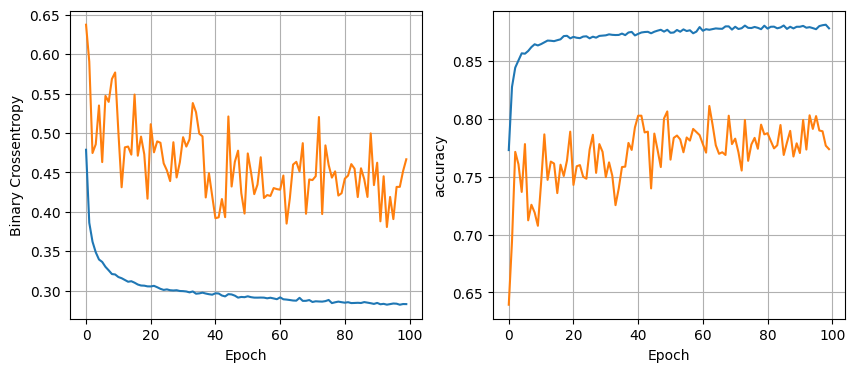

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8746
nodes = 16, dropout = 0, lr = 0.001, batch size = 32


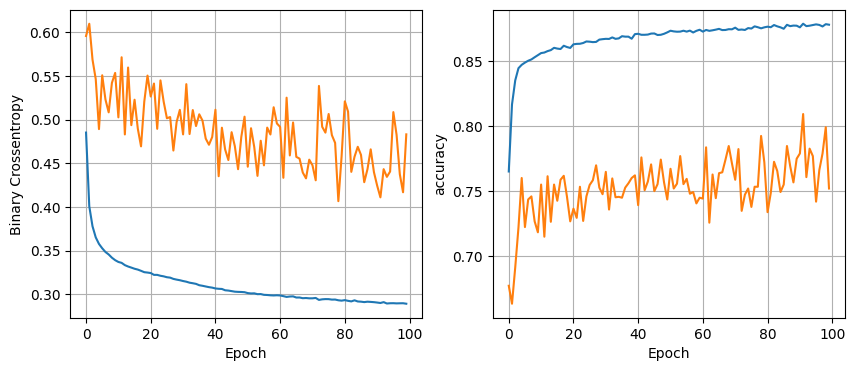

119/119 [==============================] - 0s 2ms/step - loss: 0.3062 - accuracy: 0.8754
nodes = 16, dropout = 0, lr = 0.001, batch size = 64


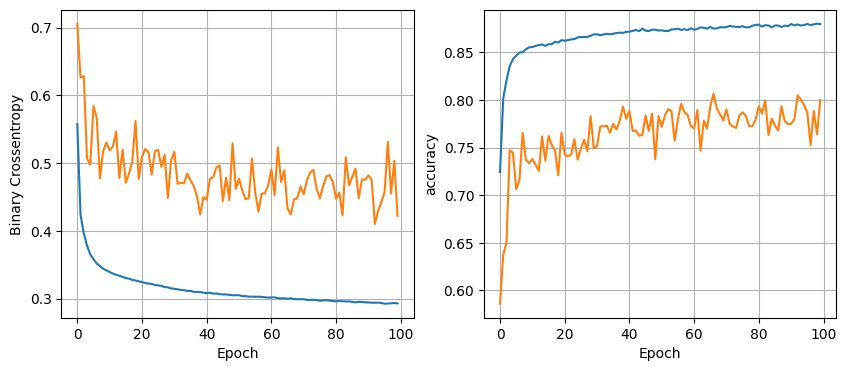

119/119 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8757
nodes = 16, dropout = 0, lr = 0.001, batch size = 128


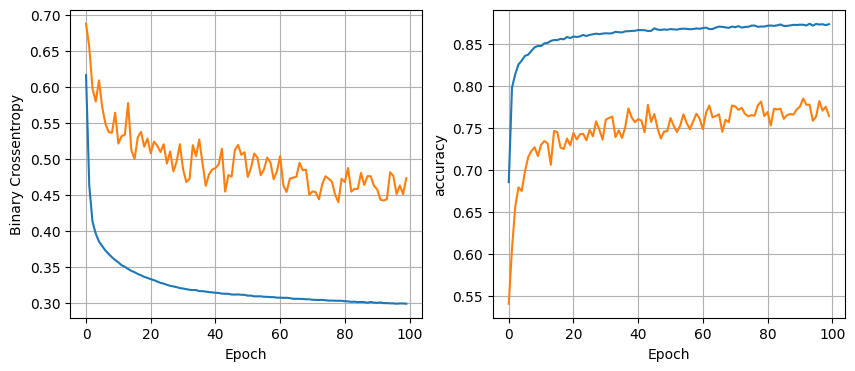

119/119 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8757
nodes = 16, dropout = 0.2, lr = 0.01, batch size = 32


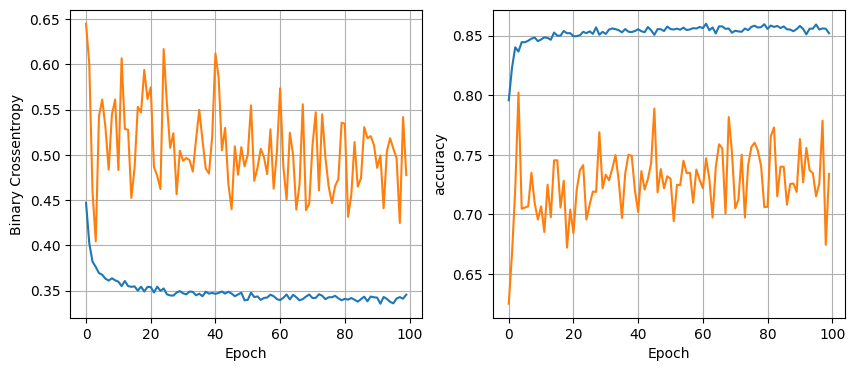

119/119 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8754
nodes = 16, dropout = 0.2, lr = 0.01, batch size = 64


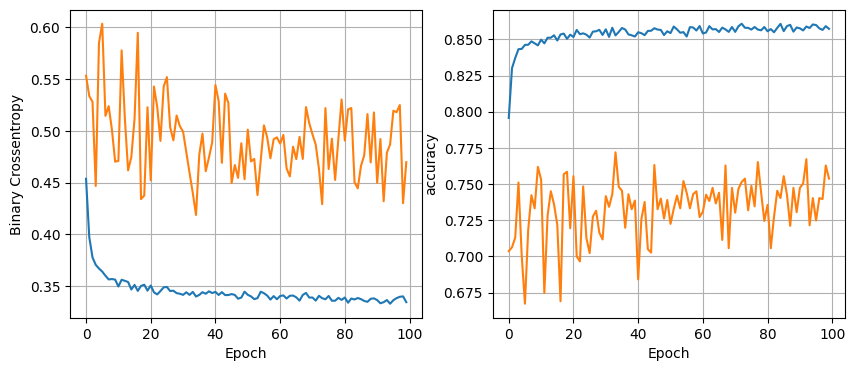

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8746
nodes = 16, dropout = 0.2, lr = 0.01, batch size = 128


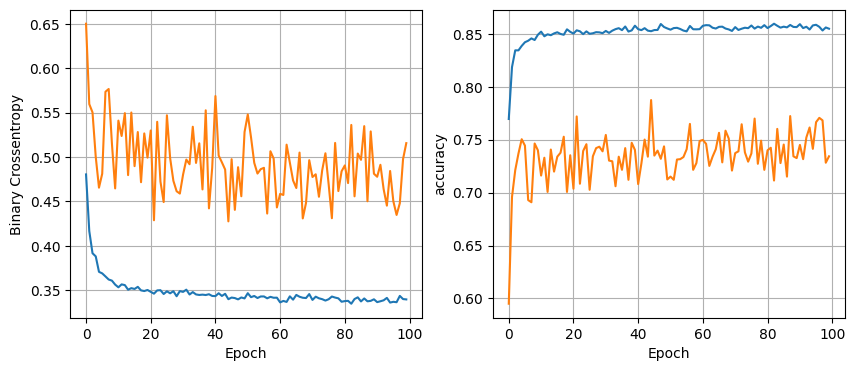

119/119 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.8722
nodes = 16, dropout = 0.2, lr = 0.005, batch size = 32


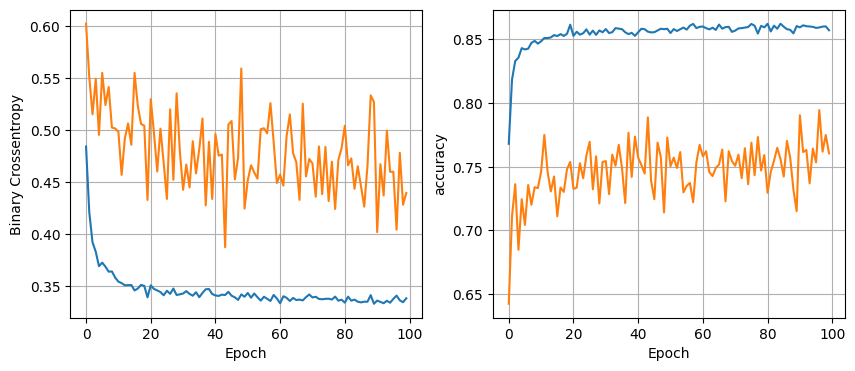

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8759
nodes = 16, dropout = 0.2, lr = 0.005, batch size = 64


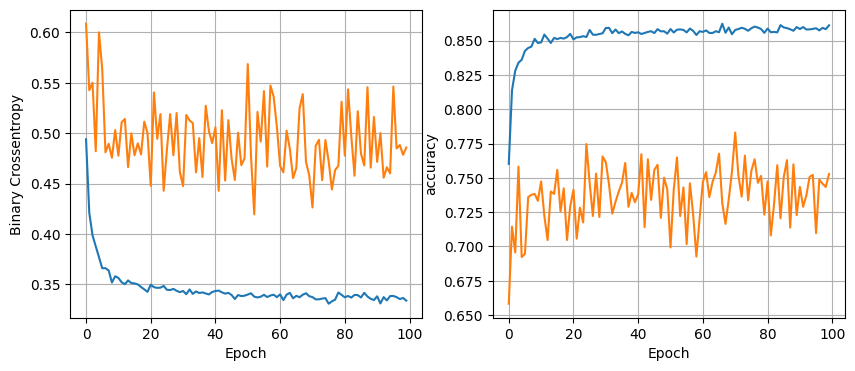

119/119 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8715
nodes = 16, dropout = 0.2, lr = 0.005, batch size = 128


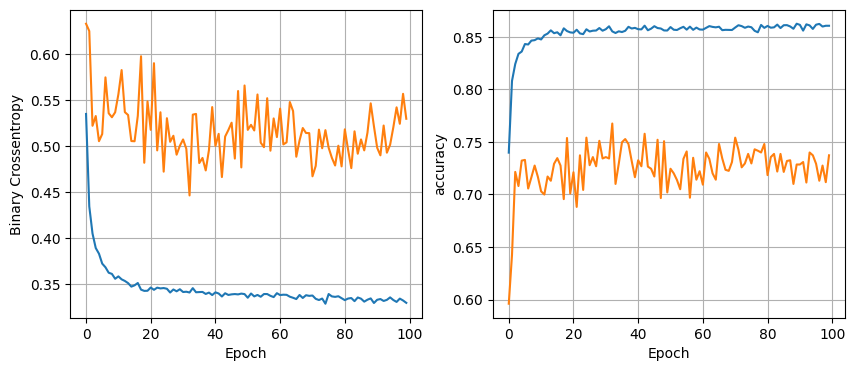

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8730
nodes = 16, dropout = 0.2, lr = 0.001, batch size = 32


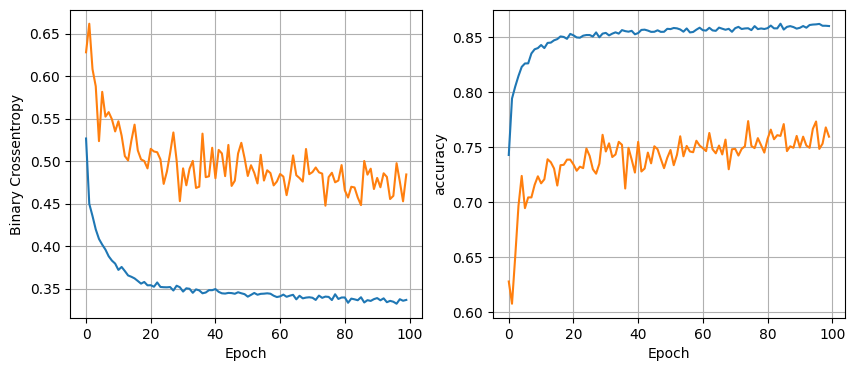

119/119 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8764
nodes = 16, dropout = 0.2, lr = 0.001, batch size = 64


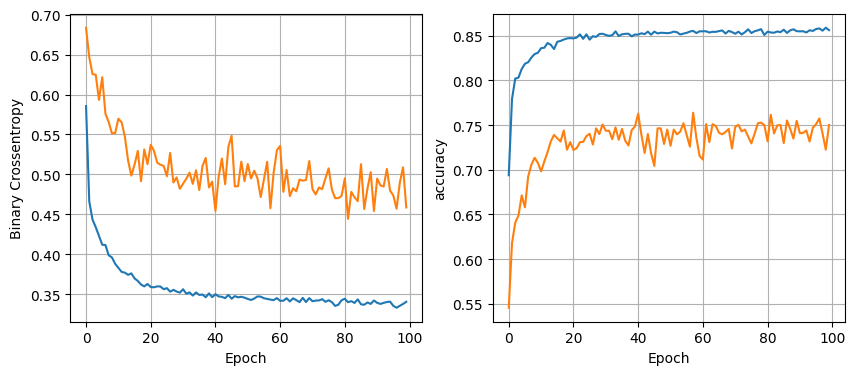

119/119 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8736
nodes = 16, dropout = 0.2, lr = 0.001, batch size = 128


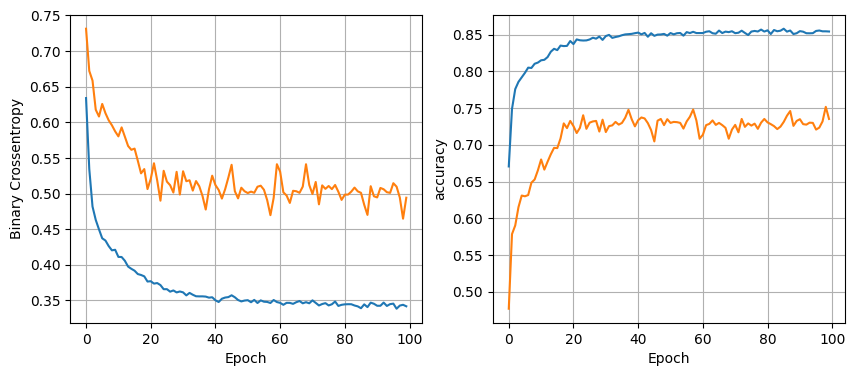

119/119 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8757
nodes = 32, dropout = 0, lr = 0.01, batch size = 32


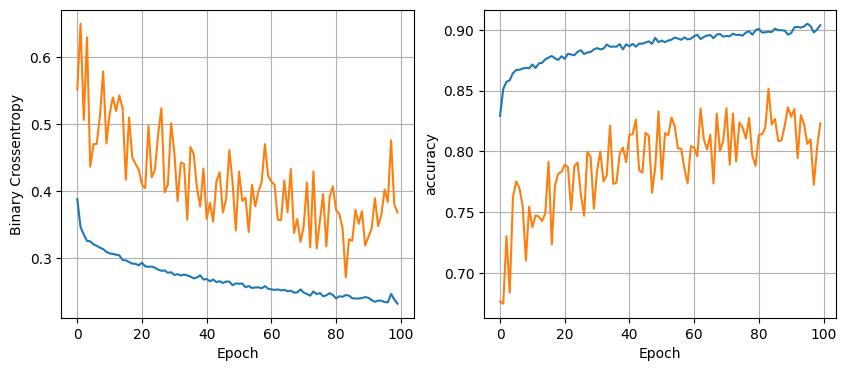

119/119 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8662
nodes = 32, dropout = 0, lr = 0.01, batch size = 64


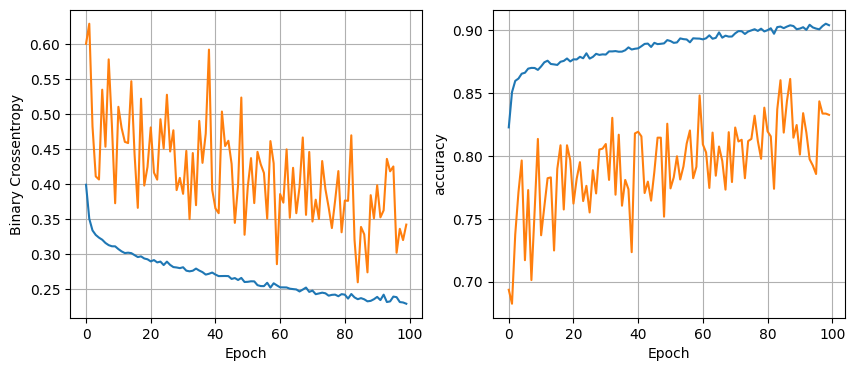

119/119 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8675
nodes = 32, dropout = 0, lr = 0.01, batch size = 128


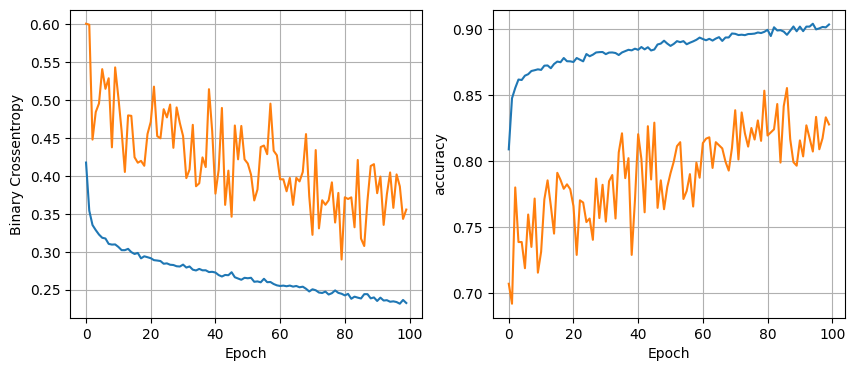

119/119 [==============================] - 0s 2ms/step - loss: 0.3590 - accuracy: 0.8704
nodes = 32, dropout = 0, lr = 0.005, batch size = 32


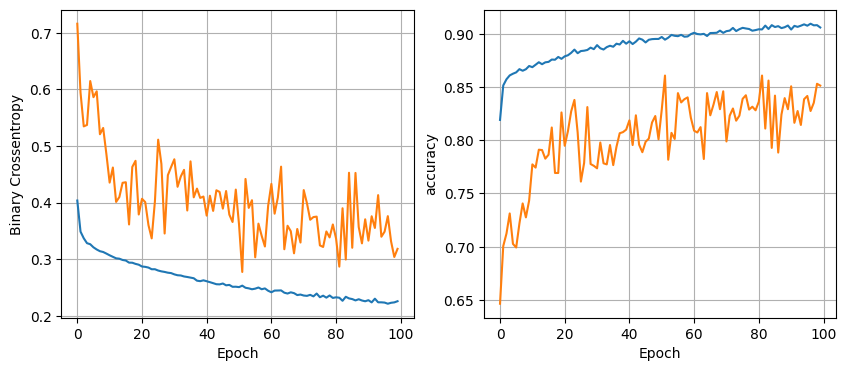

119/119 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8641
nodes = 32, dropout = 0, lr = 0.005, batch size = 64


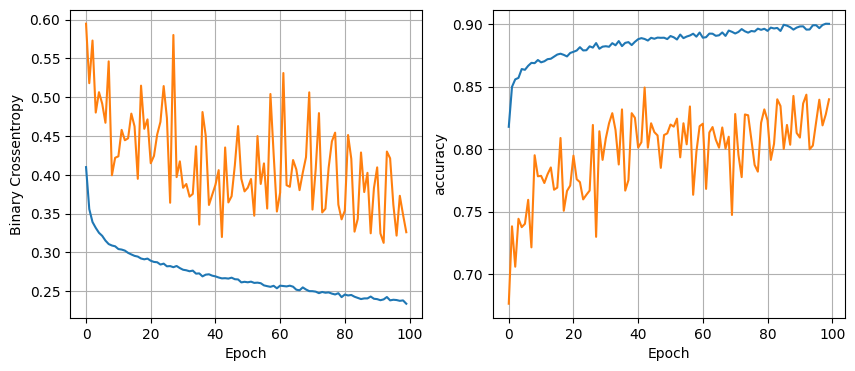

119/119 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8638
nodes = 32, dropout = 0, lr = 0.005, batch size = 128


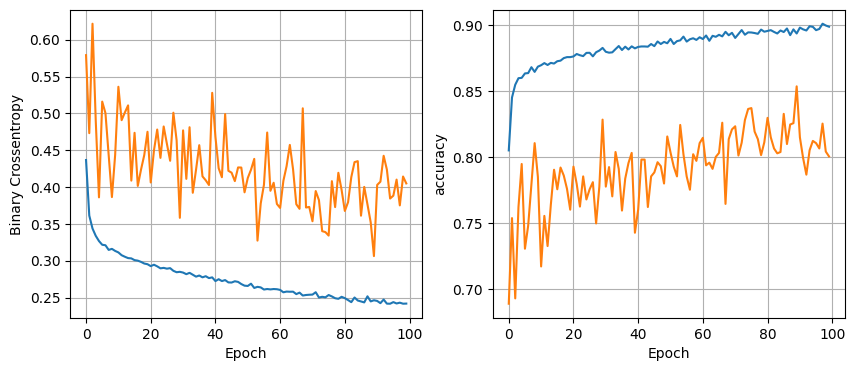

119/119 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8675
nodes = 32, dropout = 0, lr = 0.001, batch size = 32


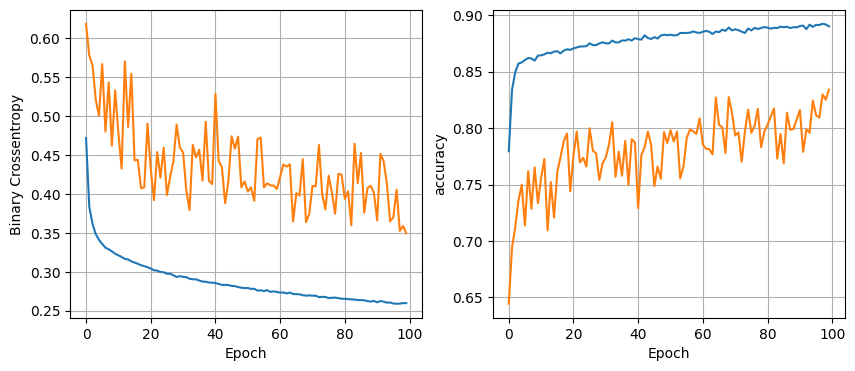

119/119 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8683
nodes = 32, dropout = 0, lr = 0.001, batch size = 64


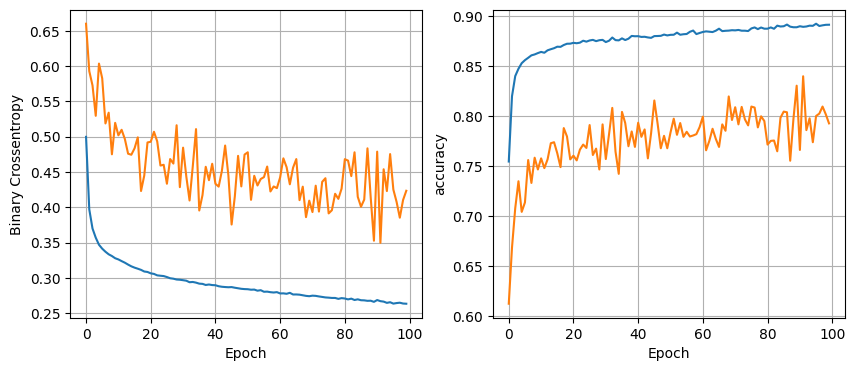

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8738
nodes = 32, dropout = 0, lr = 0.001, batch size = 128


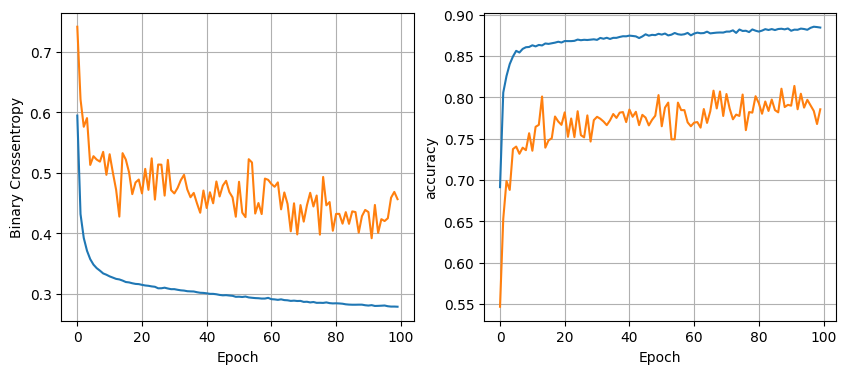

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8754
nodes = 32, dropout = 0.2, lr = 0.01, batch size = 32


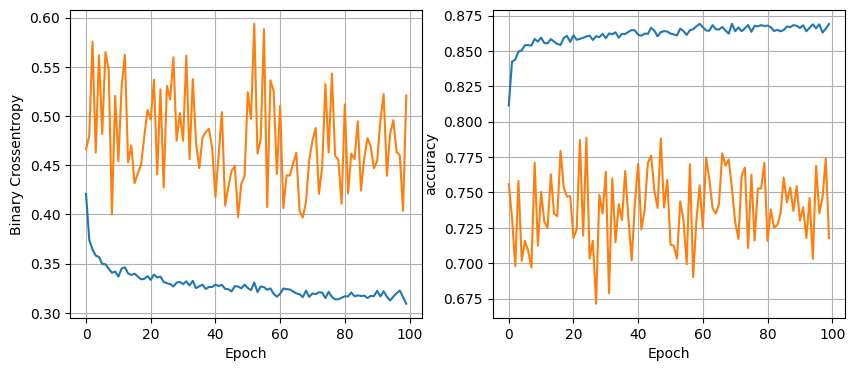

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8715
nodes = 32, dropout = 0.2, lr = 0.01, batch size = 64


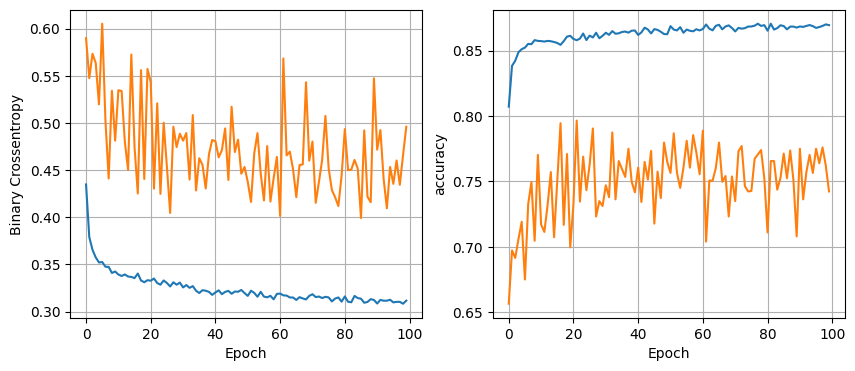

119/119 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.8762
nodes = 32, dropout = 0.2, lr = 0.01, batch size = 128


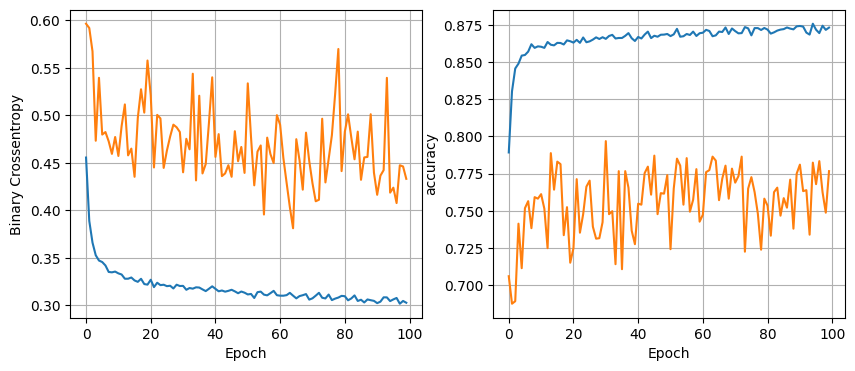

119/119 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8759
nodes = 32, dropout = 0.2, lr = 0.005, batch size = 32


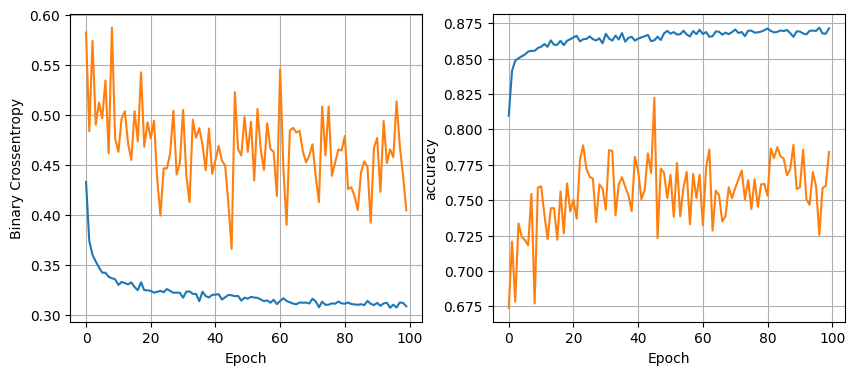

119/119 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8762
nodes = 32, dropout = 0.2, lr = 0.005, batch size = 64


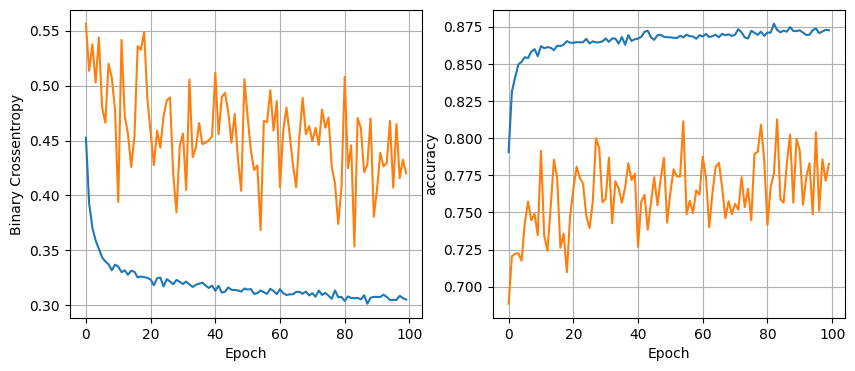

119/119 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8749
nodes = 32, dropout = 0.2, lr = 0.005, batch size = 128


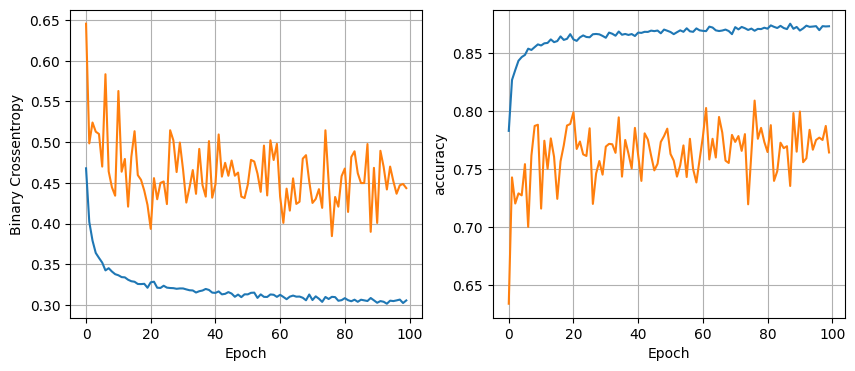

119/119 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8762
nodes = 32, dropout = 0.2, lr = 0.001, batch size = 32


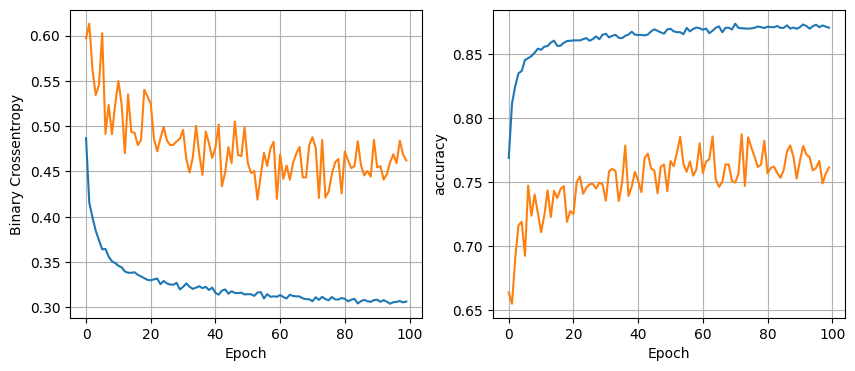

119/119 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8812
nodes = 32, dropout = 0.2, lr = 0.001, batch size = 64


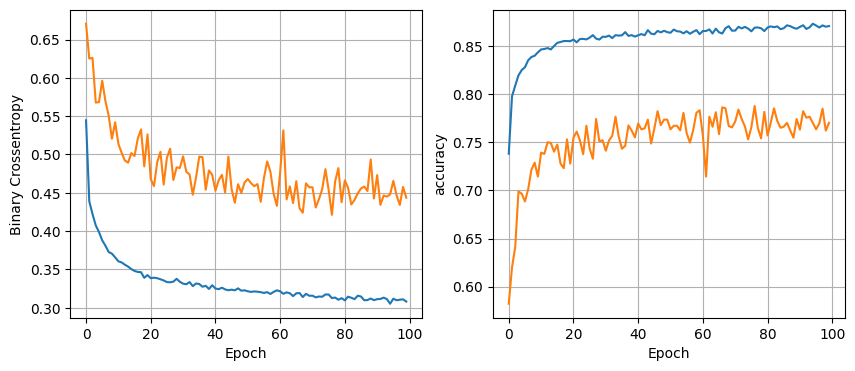

119/119 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8762
nodes = 32, dropout = 0.2, lr = 0.001, batch size = 128


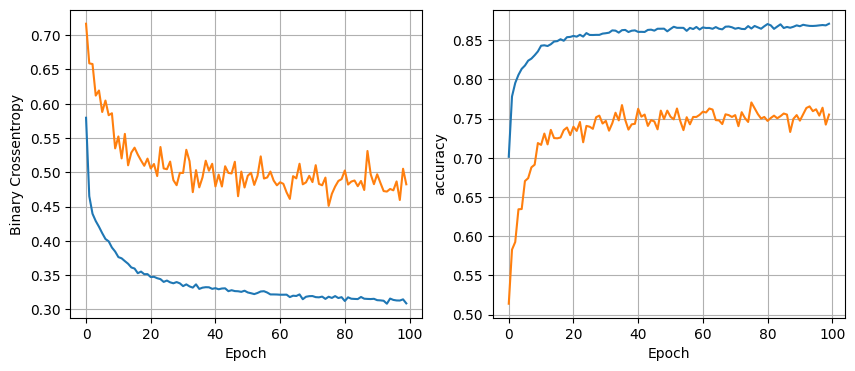

119/119 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8783
nodes = 64, dropout = 0, lr = 0.01, batch size = 32


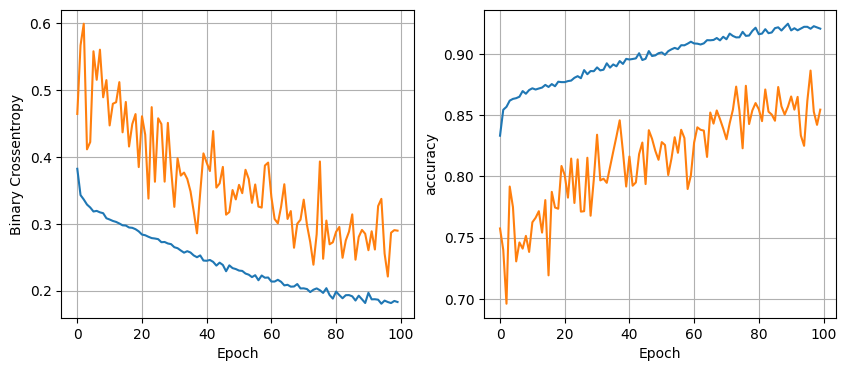

119/119 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.8625
nodes = 64, dropout = 0, lr = 0.01, batch size = 64


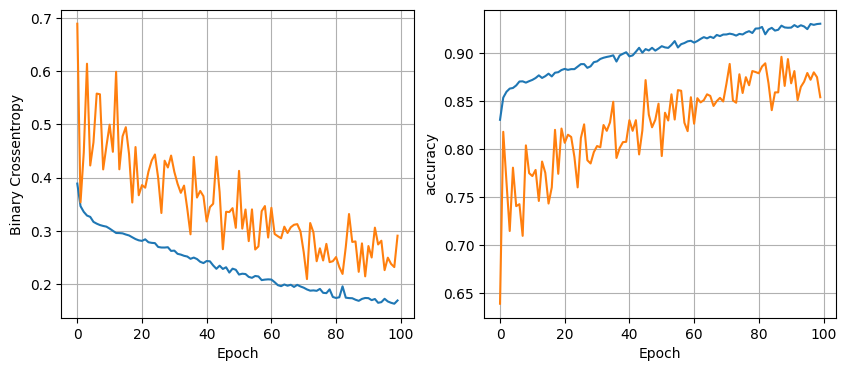

119/119 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8670
nodes = 64, dropout = 0, lr = 0.01, batch size = 128


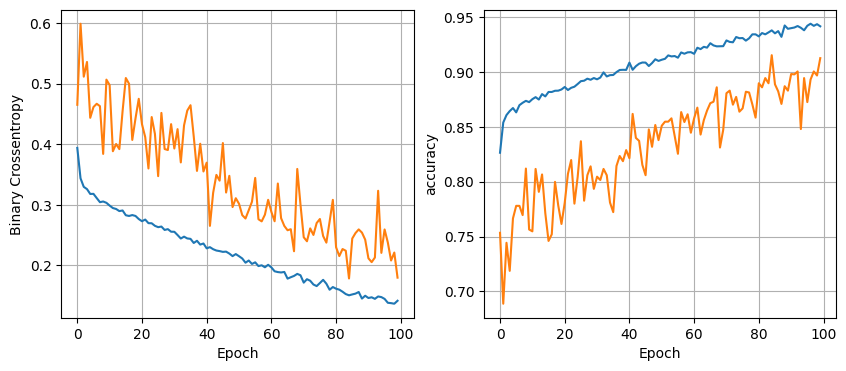

119/119 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.8607
nodes = 64, dropout = 0, lr = 0.005, batch size = 32


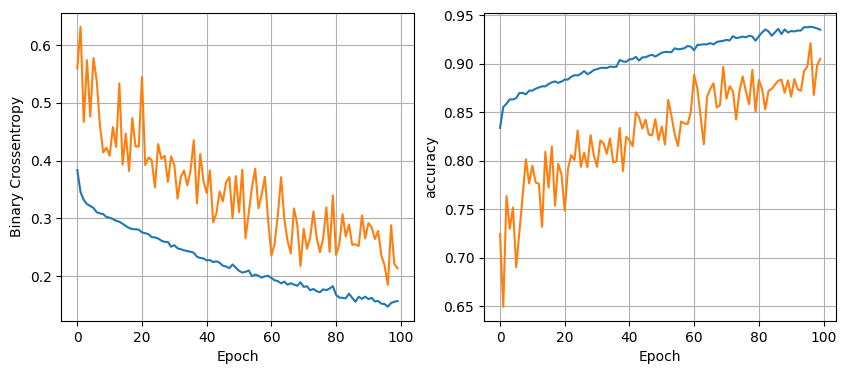

119/119 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.8504
nodes = 64, dropout = 0, lr = 0.005, batch size = 64


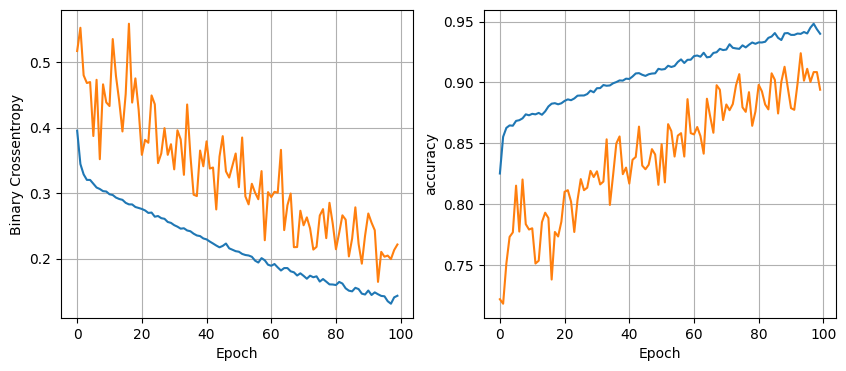

119/119 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.8636
nodes = 64, dropout = 0, lr = 0.005, batch size = 128


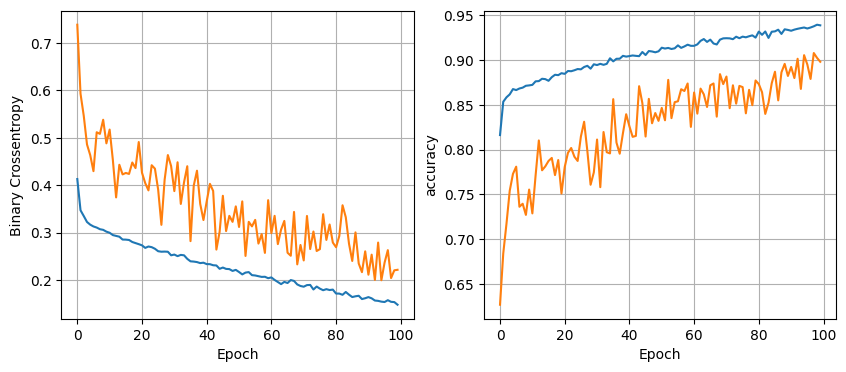

119/119 [==============================] - 0s 3ms/step - loss: 0.4575 - accuracy: 0.8615
nodes = 64, dropout = 0, lr = 0.001, batch size = 32


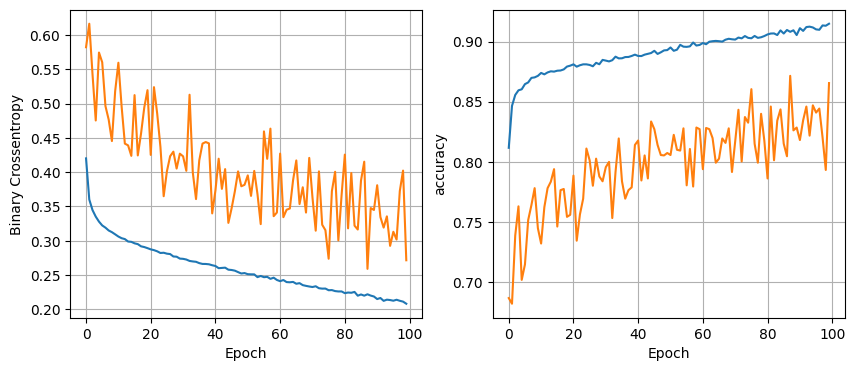

119/119 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.8620
nodes = 64, dropout = 0, lr = 0.001, batch size = 64


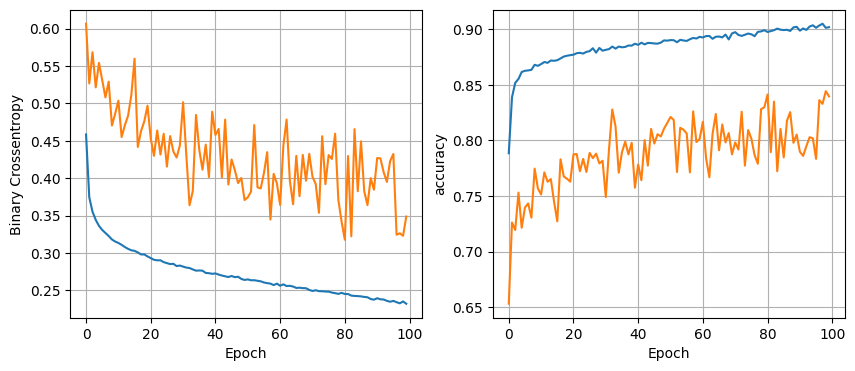

119/119 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8722
nodes = 64, dropout = 0, lr = 0.001, batch size = 128


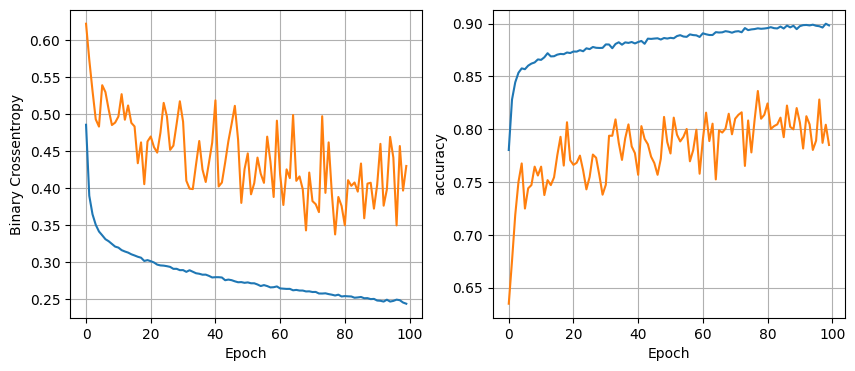

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8733
nodes = 64, dropout = 0.2, lr = 0.01, batch size = 32


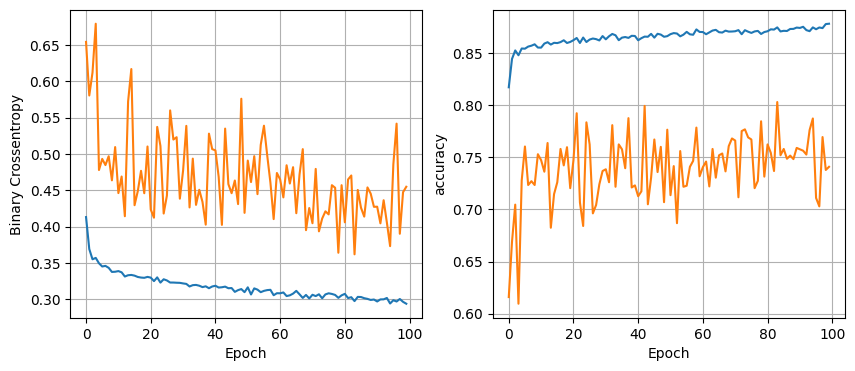

119/119 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8707
nodes = 64, dropout = 0.2, lr = 0.01, batch size = 64


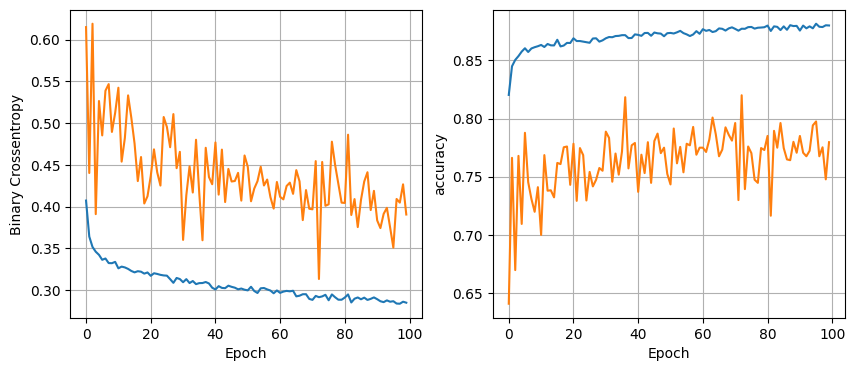

119/119 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8822
nodes = 64, dropout = 0.2, lr = 0.01, batch size = 128


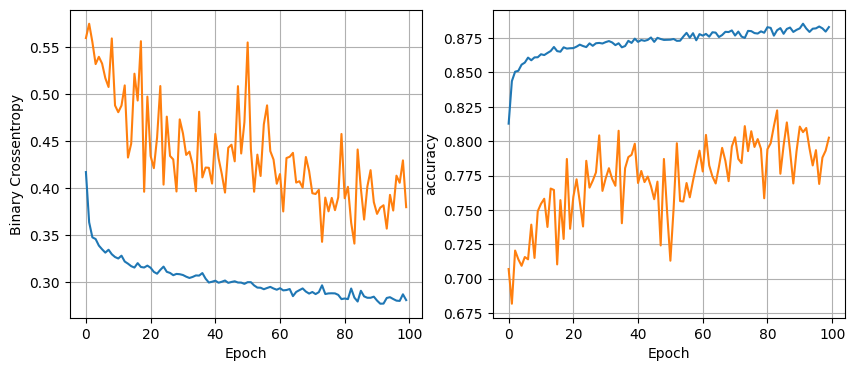

119/119 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8762
nodes = 64, dropout = 0.2, lr = 0.005, batch size = 32


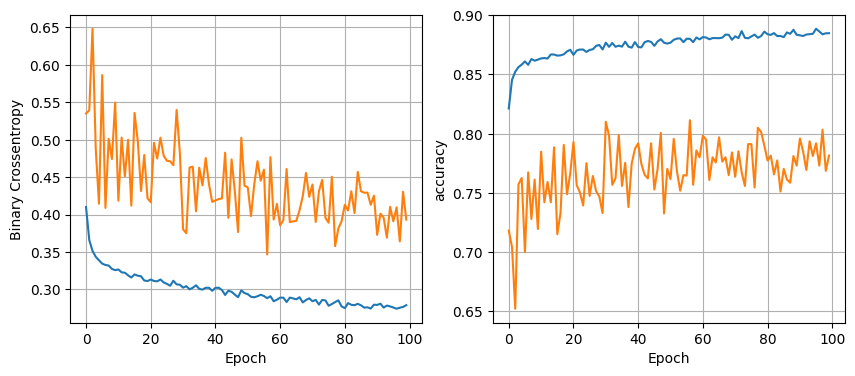

119/119 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8775
nodes = 64, dropout = 0.2, lr = 0.005, batch size = 64


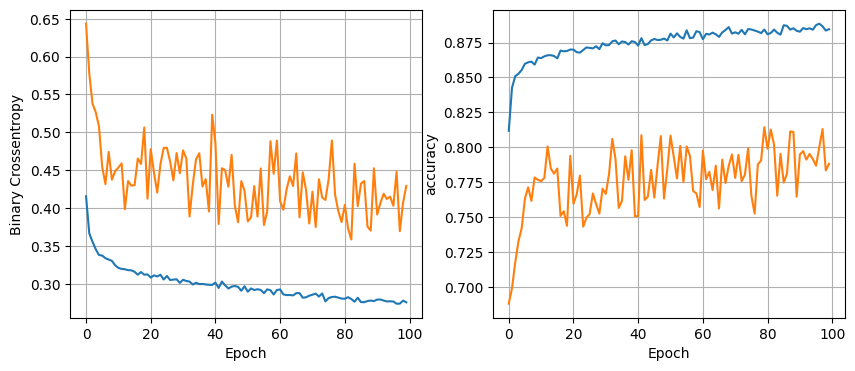

119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8764
nodes = 64, dropout = 0.2, lr = 0.005, batch size = 128


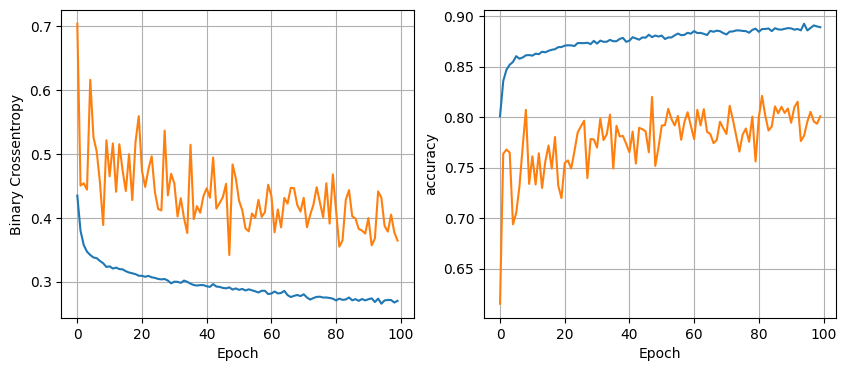

119/119 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.8783
nodes = 64, dropout = 0.2, lr = 0.001, batch size = 32


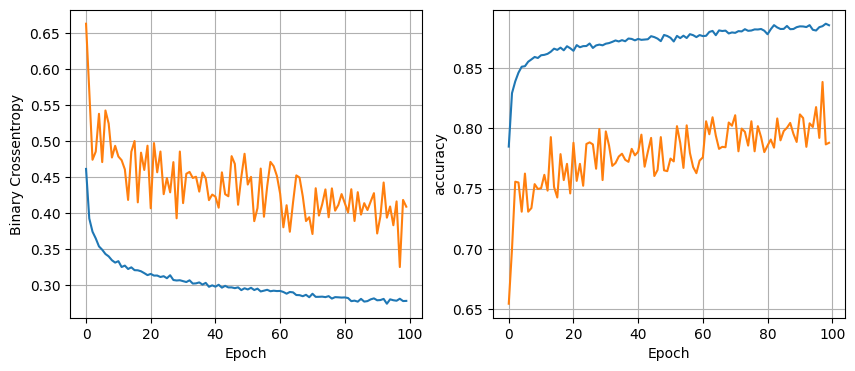

119/119 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 0.8817
nodes = 64, dropout = 0.2, lr = 0.001, batch size = 64


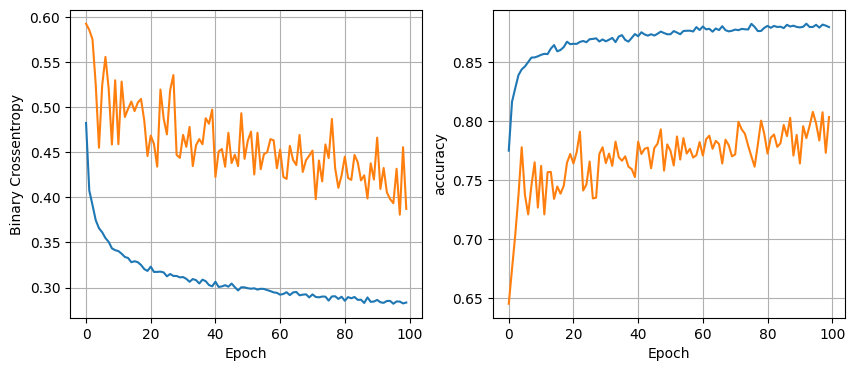

119/119 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8783
nodes = 64, dropout = 0.2, lr = 0.001, batch size = 128


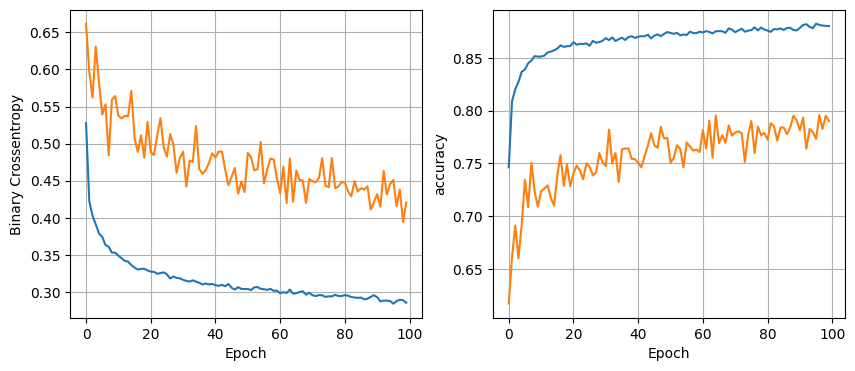

119/119 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8785


In [29]:
least_val_loss = float('inf')
least_val_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f'nodes = {num_nodes}, dropout = {dropout_prob}, lr = {lr}, batch size = {batch_size}')
                model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)

                # Evaluate on the validation set and get the loss value
                val_loss = model.evaluate(X_valid, Y_valid)[0]

                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_model = model


In [34]:
y_pred = least_val_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

119/119 [==============================] - 1s 4ms/step


In [35]:
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [36]:
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1360
           1       0.88      0.94      0.91      2444

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

